In [2]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

## II. Define the grid of modes and redshifts

Let us call the function **define\_grid\_modes\_redshits()**. It returns the bin edges for a fixed grid of modes and redshifts.

- The redshift bins are computed from the frequency according to the formula
\begin{equation}
z_n \equiv \frac{f_{21}}{\frac{f_{21}}{1+z_0} - n B} -1
\end{equation}
where $B$ is the bandwidth and $f_{21}$ is the 21cm frequency.

- The mode bins are computed from the bandwidth according to the formula
\begin{equation}
k_n \equiv {\rm max} \left\{k_{\rm min},  \delta k \right\} + n \delta k \quad {\rm with} \quad \delta k \equiv 2\pi \frac{f_{21}}{B} \frac{H(z_0)}{c(1+z_0)^2}
\end{equation}
This definition corresponds to the bins set by **21cmSense**. Note that the choice of redshift $z_0$ fixes the step of the mode bins.

In [3]:
z_bins, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 35, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157
 23.1093637  26.89753031 32.09803559]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [4]:
import py21cmfast as p21f

names = ['#Lightcone_rs1993_DM_DECAY_RATE_1.00e-50.h5', #0
         '#Lightcone_rs1993_DM_DECAY_RATE_1.00e-40.h5', #1
         '#Lightcone_rs1993_DM_DECAY_RATE_1.00e-36.h5', #2
         '#Lightcone_rs1993_DM_DECAY_RATE_1.00e-34.h5', #3
         '#Lightcone_rs1993_DM_DECAY_RATE_1.00e-33.h5', #4
         '#Lightcone_rs1993_DM_DECAY_RATE_1.00e-32.h5'] #5

runs = [None]*len(names)

for iname, name in enumerate(names):
    lightcone   = p21f.LightCone.read('../runs/NODM_M100MEV/' + name)
    runs[iname] = p21c.Run(lightcone, z_bins, k_bins, False)

/tmp/ipykernel_608805/3017760698.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('../runs/NODM_M100MEV/test_fiducial.pdf', bbox_layout='tight')


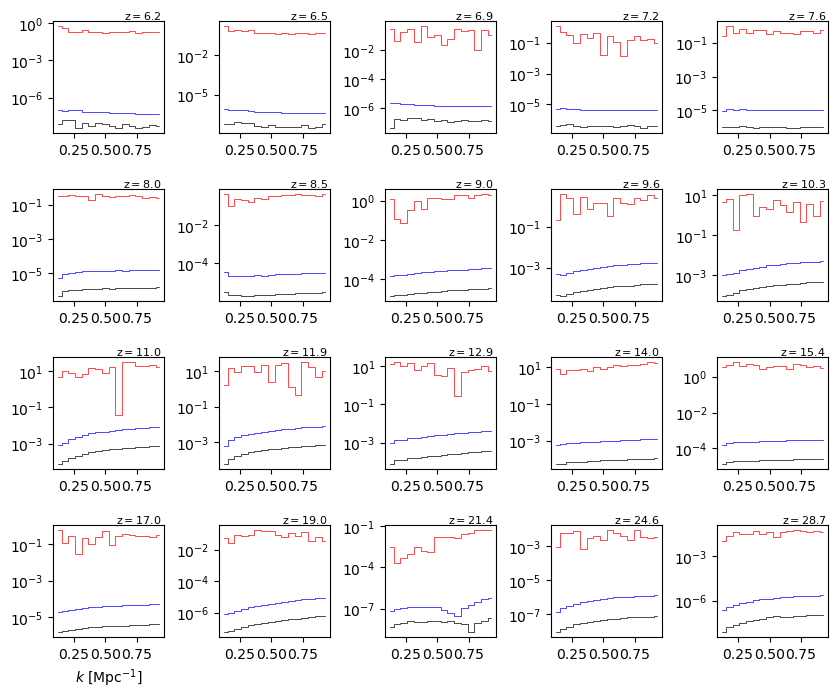

In [102]:
%matplotlib inline
ps = [run.power_spectrum for run in runs]
k_arr = runs[0].k_array
z_arr = runs[0].z_array
fig = p21c.plot_func_vs_z_and_k(z_arr, k_arr, [np.abs(ps[0] - ps[1]), np.abs(ps[0] - ps[2]), np.abs(ps[0] - ps[3]), np.abs(ps[0] - ps[4]), np.abs(ps[0] - ps[5])], ylog=True, color=['k', 'b', 'r', 'g', 'yellow'])
fig.savefig('../runs/NODM_M100MEV/test_fiducial.pdf', bbox_layout='tight')

In [79]:
print(np.max(np.abs(ps[5] - ps[3])))
print(np.max(np.abs(ps[6] - ps[3])))
print(np.max(np.abs(ps[7] - ps[3])))
print(np.max(np.abs(ps[8] - ps[3])))

31.75809630410754
38.06596598411994
74.13290147366541
402.875272953394
